In [9]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(161)
        self.fc1 = nn.Linear(161, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(228)
        self.fc1 = nn.Linear(228, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)

class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(341)
        self.fc1 = nn.Linear(341, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()
print(model4)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

549 3301
549 3301


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:471: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:472: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.1521, device='cuda:0')
Training Epoch: 0, total loss: 65.639327
total_train_accuracy: tensor(0.1979, device='cuda:0')
Training Epoch: 1, total loss: 64.821564
total_train_accuracy: tensor(0.2125, device='cuda:0')
Training Epoch: 2, total loss: 64.378983
total_train_accuracy: tensor(0.2979, device='cuda:0')
Training Epoch: 3, total loss: 63.608375
total_train_accuracy: tensor(0.3792, device='cuda:0')
Training Epoch: 4, total loss: 62.597667
total_train_accuracy: tensor(0.3917, device='cuda:0')
Training Epoch: 5, total loss: 61.917998
total_train_accuracy: tensor(0.3958, device='cuda:0')
Training Epoch: 6, total loss: 62.120583
total_train_accuracy: tensor(0.4438, device='cuda:0')
Training Epoch: 7, total loss: 61.248074
total_train_accuracy: tensor(0.4333, device='cuda:0')
Training Epoch: 8, total loss: 61.159234
total_train_accuracy: tensor(0.4604, device='cuda:0')
Training Epoch: 9, total loss: 60.421024
total_train_accuracy: tensor(0.5042, device='cuda:

total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 87, total loss: 46.659167
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 88, total loss: 47.005431
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 89, total loss: 46.897787
total_train_accuracy: tensor(0.8771, device='cuda:0')
Training Epoch: 90, total loss: 47.142916
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 91, total loss: 46.376517
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 92, total loss: 46.377531
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 93, total loss: 45.642931
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 94, total loss: 46.092477
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 95, total loss: 46.086702
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 96, total loss: 47.022744
total_train_accuracy: tensor(0.8958, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


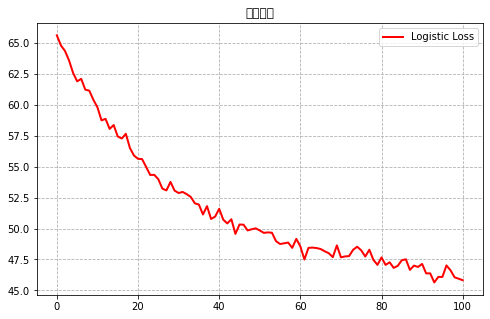

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:509: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:510: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.8729, device='cuda:0')
Training Epoch: 0, total loss: 47.180452
total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 1, total loss: 46.946149
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 2, total loss: 46.444227
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 3, total loss: 46.480602
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 4, total loss: 46.329033
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 5, total loss: 46.657783
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 6, total loss: 45.895543
total_train_accuracy: tensor(0.8938, device='cuda:0')
Training Epoch: 7, total loss: 46.330257
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 8, total loss: 45.916044
total_trai

KeyboardInterrupt: 

In [2]:
#using MLP model to train the 3300 genes
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       
#

MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 3301


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.8576684276030682
accuracy_score: 0.8623188405797102
recall_score: 0.8630936819172113
pre_recall: 0.8664175386800915
n_classes: 9


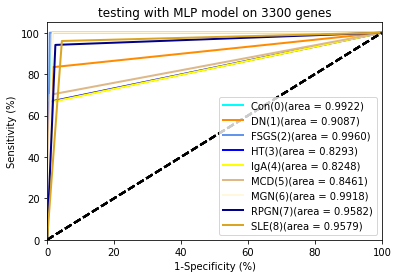

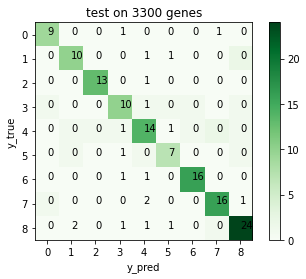

In [2]:
##test the 3300 MLP model
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing with MLP model on 3300 genes')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('test on 3300 genes')      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()

In [2]:
#find the means of  the predicted correctly as group features
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def bool_predict_model(test_dl, model): 
    model.eval()#测试数据稳定
    error_dataset=torch.tensor([0])
    error_dataset=error_dataset.view(1,1)
    predictions, actuals = [], [] 
    num=0
    for i, (inputs,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        #bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
        #print(targets)
        #print('targets:',targets.shape)        
        #targets=targets.argmax(axis=1)  
        #print('targets:',targets.shape)
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        #bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(),targets.cuda() 
        yhat = model(inputs) 
        
        yhat=yhat.argmax(axis=1)
        print('yhat:',yhat.shape)
        
        if targets==yhat:
            return True
        else:
            return False
#find

In [3]:
#find the samples that predicted correctly for computeing the mean
#and save it
import pandas as pd 
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info1.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
#mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model


#testset = KZDatasetPredict(test_df)
''''
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
'''
#delet the errorly predicted samples in 3300 test dataset
false_list=[]
for i in range(rows):
    df_list=test_df.iloc[i,:].tolist()
    print(type(df_list))
    print('df_list:',df_list[-1])
    #print(data_set)
    print('this is data_set')
    data_set = KZDatasetPredict(df_list)
    data_test_loader=data.DataLoader(dataset=data_set,
                                    batch_size=1)
    print(data_test_loader)
    bool_index=bool_predict_model(data_test_loader,model)
    print(bool_index)
    if bool_index==False:
        
        false_list.append(i)
        #test_df=test_df.drop(index=i, inplace=True)
        
for i,aitem in enumerate(false_list):
    test_df.drop(index=i, inplace=True)
print(test_df.shape)   

test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3.csv')

138 3301
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_se

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
False
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
False
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
False
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
False
<class 'list'>
df_list: 7

yhat: torch.Size([1])
False
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0


In [4]:
#compute mean value of all the correctly predicted samples as group features:
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行



#compute top 50 genes as features for one group diseas
#compute union of all groups' features 
#extract the training and test dataset based on the union for the evaluation model

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,50,largest=True)# top 50
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/contri_50_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/genes_all.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/test_info.csv')





118 3301
RHOA       11.792157
STX2        7.690638
CISD1       9.532091
WDR11       8.285777
SCYL2       6.868603
             ...    
SULT1A1    10.304439
AMOT       11.585499
CA1         6.508585
GPR35       5.447444
label       4.694915
Length: 3301, dtype: float64
[[11.79215674  7.69063812  9.53209125 ... 11.58549873  6.50858505
   5.44744399]]
        0         1         2         3         4         5         6     \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       7         8         9     ...      3290      3291      3292      3293  \
0  5.615789  5.040705  6.717693  ...  8.144511  6.226283  8.062481  6.368055   

       3294     3295       3296       3297      3298      3299  
0  7.609171  6.73945  10.304439  11.585499  6.508585  5.447444  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11     SCYL2   MGC2889    CCDC47  \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       KLF8      CCL1   SLC

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


['WDR12', 'UBXN8', 'ESRRA', 'RPS24', 'ITIH2', 'MT1F', 'OAS1', 'MT2A', 'CYP27A1', 'SLC49A3', 'IFIT2', 'PDK3', 'ALB', 'AADAC', 'FGFR2', 'ZNF593', 'NDUFA2', 'KLF6', 'F12', 'ALOX5AP', 'ACPP', 'PAX2', 'ENPP2', 'DNAJB1', 'ARL6IP1', 'FMO2', 'RAB11FIP1', 'C1orf68', 'KPNA3', 'RORA', 'TMBIM6', 'LGALS4', 'ERGIC2', 'METTL9', 'COX15', 'LLGL2', 'ABCG2', 'DUSP6', 'NINL', 'MUC16', 'OVOL2', 'TESC', 'SUCLG1', 'MRPL3', 'LSM8', 'PTMS', 'GPC5', 'BCCIP', 'MRPS15', 'IGLV2-14', 'CFLAR', 'CHP1', 'TRA2A', 'RHOB', 'AGL', 'AFDN-DT', 'ACTA2', 'LYPLA1', 'LGMN', 'RHOBTB1', 'ACADVL', 'ABCD3', 'ANXA3', 'RSPH14', 'SLC27A2', 'BHLHE40', 'THOC6', 'GPX3', 'COX5B', 'AFP', 'ABCB7', 'RBKS', 'MUC1', 'PLEKHA5', 'ALDH1A1', 'COQ9', 'HERC5', 'EEF1AKMT3', 'RPA3', 'PPM1E', 'WASHC3', 'DAB2', 'PIM1', 'RPS16', 'ADD3', 'SETD3', 'FADS2', 'CHGB', 'CGA', 'RRM2', 'FDX1', 'TFAM', 'MT1G', 'NDUFB5', 'ABHD2', 'PSMB3', 'STK32B', 'ATP5IF1', 'CYP2J2', 'TTC3', 'CLDN4', 'PARP11', 'ADPRM', 'ALDH1B1', 'ACTL8', 'HIRA', 'DLD', 'SLC25A36', 'DEFB1', 'IGF1

549 342
549 342


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:491: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:492: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2521, device='cuda:0')
Training Epoch: 0, total loss: 63.784885
total_train_accuracy: tensor(0.4750, device='cuda:0')
Training Epoch: 1, total loss: 61.118646
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 2, total loss: 58.796287
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 3, total loss: 57.309889
total_train_accuracy: tensor(0.6792, device='cuda:0')
Training Epoch: 4, total loss: 56.802543
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 5, total loss: 55.696244
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 6, total loss: 54.944662
total_train_accuracy: tensor(0.7917, device='cuda:0')
Training Epoch: 7, total loss: 54.573391
total_train_accuracy: tensor(0.8021, device='cuda:0')
Training Epoch: 8, total loss: 54.034038
total_train_accuracy: tensor(0.8229, device='cuda:0')
Training Epoch: 9, total loss: 53.069612
total_train_accuracy: tensor(0.7917, device='cuda:

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 87, total loss: 45.938643
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 88, total loss: 45.590110
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 44.823186
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 45.369187
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 91, total loss: 45.293390
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 45.185920
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 45.032371
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 44.726620
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 95, total loss: 45.450598
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 96, total loss: 45.165354
total_train_accuracy: tensor(0.9229, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


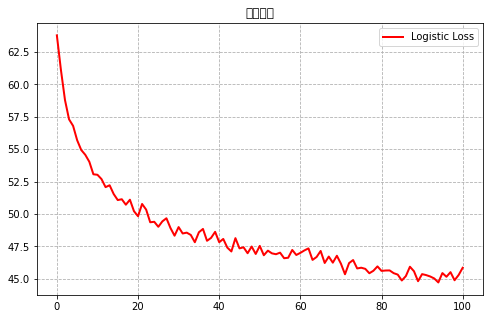

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:529: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 0, total loss: 45.622596
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 1, total loss: 45.639152
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 2, total loss: 45.438425
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 3, total loss: 45.739876
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 4, total loss: 45.217347
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 45.264783
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 6, total loss: 45.520039
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 7, total loss: 45.344255
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 8, total loss: 44.985540
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.635561
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 43.722460
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 43.303169
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 88, total loss: 43.795807
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.936861
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 43.528960
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 91, total loss: 44.063652
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 43.817389
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.655650
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 43.875940
total_train_accuracy: tensor(0.9604, dev

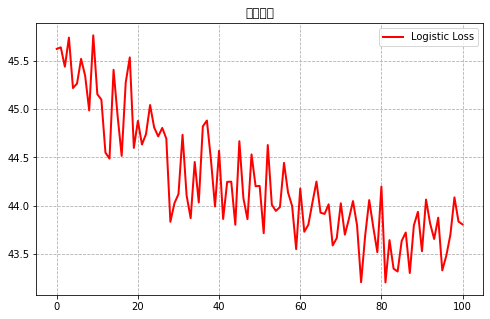

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.985661
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 1, total loss: 44.308610
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 44.079850
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.831524
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 43.487162
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 43.401282
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.389764
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.408412
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 43.363509
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.879546
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 87, total loss: 43.317276
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.110622
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.133542
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 43.046294
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.549687
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.997580
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.204925
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.686754
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 95, total loss: 43.155320
total_train_accuracy: tensor(0.9646, dev

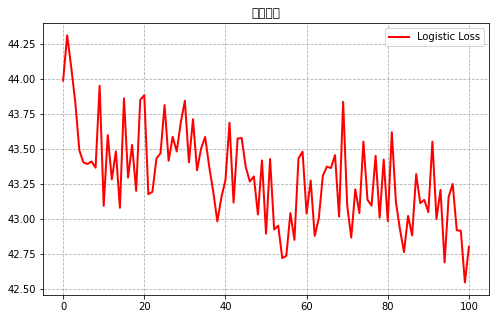

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 43.702407
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.271333
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 43.281735
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.444554
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.076835
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.990719
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.022274
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.895039
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.762926
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.701023
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.417784
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.682411
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.058349
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.553600
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.983510
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 43.064864
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.685606
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.286083
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.721918
total_train_accuracy: tensor(0.9667, dev

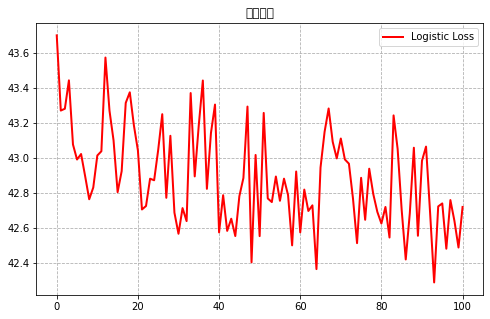

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.692385
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 43.044707
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 2, total loss: 42.376166
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.311405
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.597854
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.559402
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.557948
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.582543
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.527383
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.633636
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.597147
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.736700
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.323852
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.602932
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.490465
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.783327
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.610577
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.757680
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.513290
total_train_accuracy: tensor(0.9604, dev

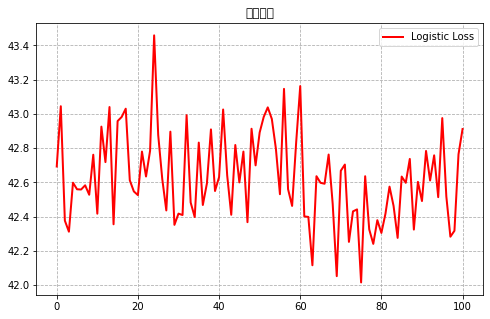

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.819723
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.854916
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 43.037336
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.116488
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.810876
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.305414
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.483498
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.750911
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.298929
total_train_

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.701722
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 42.874555
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.863791
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.230556
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.262076
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 42.860490
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.499144
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.529274
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.722546
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.505119
total_train_accuracy: tensor(0.9833, dev

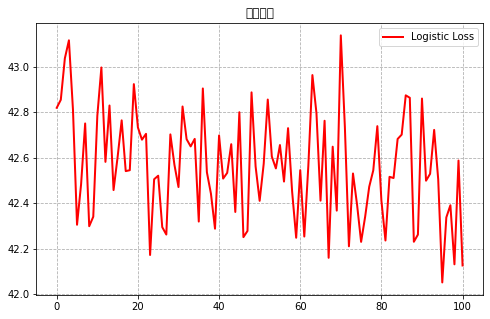

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.800158
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.573503
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.118289
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.790421
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.294431
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.438981
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.399206
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.677814
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 8, total loss: 42.288277
total_train_accuracy

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.397604
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.131251
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.139933
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 88, total loss: 42.054473
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.243261
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.453918
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.576031
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 42.785326
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.629585
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.503605
total_train_accuracy: tensor(0.9667, dev

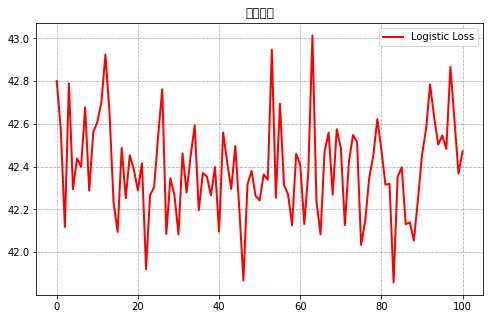

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 42.851656
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.691159
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.631008
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.326104
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.502136
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.664874
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.247290
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.140411
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 42.779226
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.506943
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 42.544695
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 87, total loss: 41.757659
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.251320
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 89, total loss: 42.111082
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.156472
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 91, total loss: 41.911729
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.405741
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.188639
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.110990
total_train_accuracy: tensor(0.9771, dev

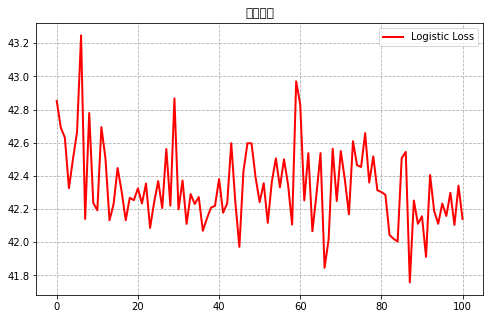

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.511343
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.412520
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.304254
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.205261
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.383724
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.459192
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.254710
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.351723
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.274701
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 41.923757
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 86, total loss: 41.876746
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.170461
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 88, total loss: 41.766153
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 89, total loss: 41.975982
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.337214
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.573007
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.217717
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 41.990220
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 42.778286
total_train_accuracy: tensor(0.9833, dev

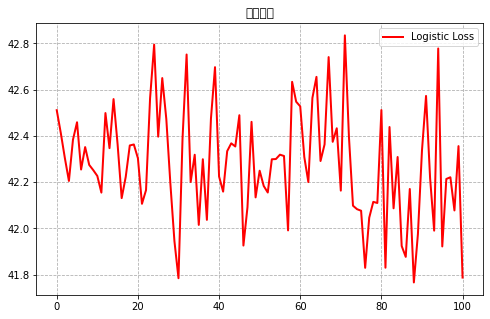

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 342
549 342
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 0, total loss: 42.196371
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 1, total loss: 42.171107
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 2, total loss: 41.986863
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.137191
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.228588
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.254975
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.347938
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 41.875194
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.185475
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.326145
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 86, total loss: 42.045591
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.464261
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.269967
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.233544
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 41.937134
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.712307
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.500057
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.395754
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 94, total loss: 42.000589
total_train_accuracy: tensor(0.9833, dev

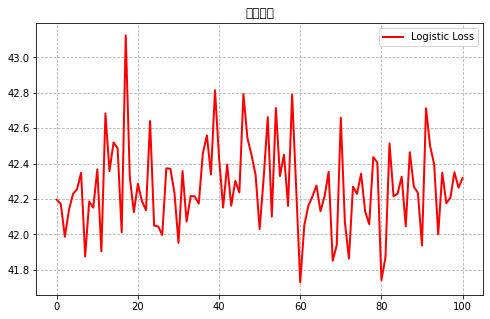

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.7917, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.7916667, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9645834


In [10]:
#train the evaluation model for 
model=model4
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_s/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP4(
  (bn0): BatchNorm1d(341, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=341, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 342
f1_score:  %.4f 0.8883636543366473
accuracy_score: 0.8913043478260869
recall_score: 0.8966915655150949
pre_recall: 0.8964776146148695


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

n_classes: 9


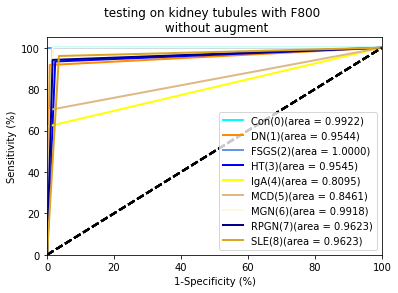

In [11]:
#evaluate top 50
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_s/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP4()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_s/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing on kidney tubules with F800 \n without augment')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [10]:
#compute mean value of all the correctly predicted samples: based on top 20
#evaluate based on top 20, repeat the step of top 50
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q







def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,20,largest=True)##################top20
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print('contri_k_names_np:',contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/contri_20_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/genes_all_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/test_info.csv')





118 3301
RHOA       11.792157
STX2        7.690638
CISD1       9.532091
WDR11       8.285777
SCYL2       6.868603
             ...    
SULT1A1    10.304439
AMOT       11.585499
CA1         6.508585
GPR35       5.447444
label       4.694915
Length: 3301, dtype: float64
[[11.79215674  7.69063812  9.53209125 ... 11.58549873  6.50858505
   5.44744399]]
        0         1         2         3         4         5         6     \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       7         8         9     ...      3290      3291      3292      3293  \
0  5.615789  5.040705  6.717693  ...  8.144511  6.226283  8.062481  6.368055   

       3294     3295       3296       3297      3298      3299  
0  7.609171  6.73945  10.304439  11.585499  6.508585  5.447444  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11     SCYL2   MGC2889    CCDC47  \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       KLF8      CCL1   SLC

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.return_types.topk(
values=tensor([20.6346, 19.6775, 17.0103, 15.8534, 15.8134, 15.6864, 15.0135, 14.9125,
        14.7480, 14.6068, 13.7896, 13.6762, 13.6750, 13.4884, 13.3645, 13.3638,
        12.9010, 12.7210, 12.6398, 12.4820], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([1209, 2496, 1270, 3280, 1881, 2345, 2395, 2138, 1065,  826, 2217,  952,
         165, 2429,  106, 2342, 1390, 1896,  937,  516], device='cuda:0'))
top_k_indices: [1209, 2496, 1270, 3280, 1881, 2345, 2395, 2138, 1065, 826, 2217, 952, 165, 2429, 106, 2342, 1390, 1896, 937, 516]
['GPX2', 'BCCIP', 'CFB', 'NDUFB3', 'ATP6V1F', 'LDHB', 'ALOX5AP', 'UGDH', 'FRMD8', 'RHOBTB1', 'METTL9', 'PPP6R1', 'CGREF1', 'ELF3', 'MUC1', 'ANKRD2', 'HIRA', 'SLC16A1', 'SH3BP2', 'ABCC3']
torch.Size([3300])
top_k: torch.return_types.topk(
values=tensor([44.1815, 29.7199, 29.2290, 27.9653, 24.1130, 23.4687, 21.9076, 21.5197,
        21.1449, 20.9056, 20.5464, 18.9453, 18.7567, 18.1229, 17.8236, 17.6358,
        17.6045

549 162
549 162


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:491: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:492: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2458, device='cuda:0')
Training Epoch: 0, total loss: 64.093657
total_train_accuracy: tensor(0.5396, device='cuda:0')
Training Epoch: 1, total loss: 60.428525
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 2, total loss: 58.672728
total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 3, total loss: 57.297466
total_train_accuracy: tensor(0.6958, device='cuda:0')
Training Epoch: 4, total loss: 56.532246
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 5, total loss: 56.014434
total_train_accuracy: tensor(0.7563, device='cuda:0')
Training Epoch: 6, total loss: 55.510799
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 7, total loss: 54.960961
total_train_accuracy: tensor(0.8063, device='cuda:0')
Training Epoch: 8, total loss: 53.940445
total_train_accuracy: tensor(0.7938, device='cuda:0')
Training Epoch: 9, total loss: 53.630507
total_train_accuracy: tensor(0.7979, device='cuda:

total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 86, total loss: 46.373990
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 45.473992
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 88, total loss: 45.694193
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 89, total loss: 45.120109
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 90, total loss: 45.791464
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 91, total loss: 45.552244
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 92, total loss: 46.118438
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 93, total loss: 45.585017
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 45.076266
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 95, total loss: 44.926815
total_train_accuracy: tensor(0.9500, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 100, total loss: 45.192318
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


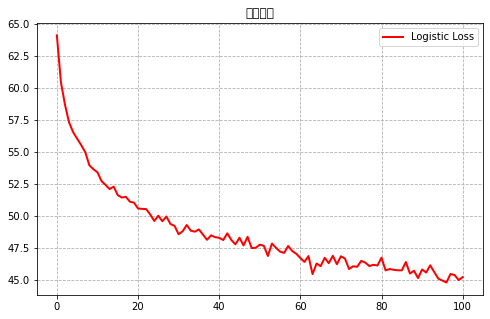

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:529: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.669644
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 45.357011
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 2, total loss: 45.377752
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 3, total loss: 45.125310
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 4, total loss: 45.608763
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 45.297787
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 44.879181
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 7, total loss: 44.898211
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 44.679144
total_train_

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 85, total loss: 43.420510
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.533834
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 43.381044
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.614021
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.545405
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 43.365655
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.683269
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 92, total loss: 43.789544
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 93, total loss: 43.896873
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.710303
total_train_accuracy: tensor(0.9729, dev

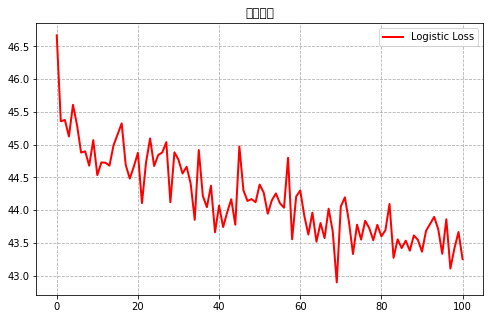

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.916392
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 44.043179
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.756908
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 43.598154
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.806703
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.767546
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.797121
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 43.636953
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.294770
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.932509
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.997715
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.045795
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.087019
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.867315
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.737606
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.951944
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.904138
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.649610
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.810186
total_train_accuracy: tensor(0.9813, dev

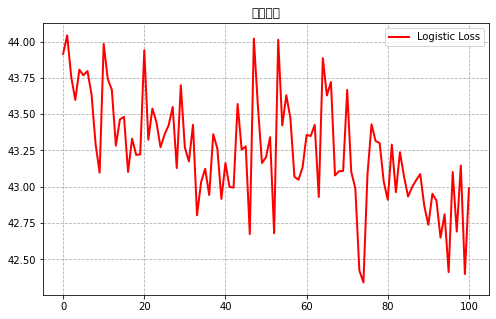

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.437954
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.241791
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.492880
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.809113
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.006227
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 5, total loss: 43.414911
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 43.016606
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 7, total loss: 43.194021
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.976722
total_train_

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.698572
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.503735
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 87, total loss: 42.303546
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.400767
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.555512
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.585011
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.344278
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.430468
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.295744
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.192938
total_train_accuracy: tensor(0.9750, dev

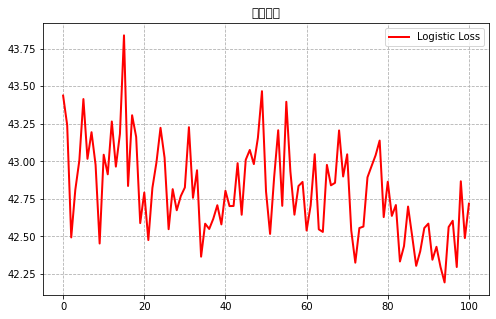

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.479940
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 43.234287
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.351642
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.759483
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.269074
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.898976
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.996247
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.740029
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.290034
total_train_

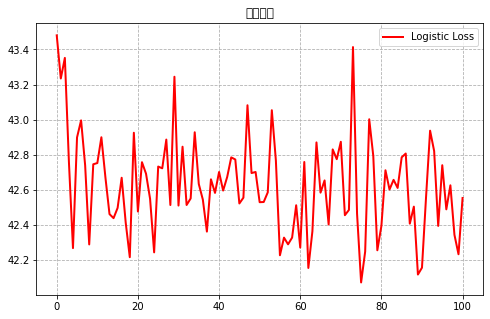

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.761048
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.392196
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.491973
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.790454
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.672305
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.337311
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.679598
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.461420
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.749858
total_train_

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 42.926095
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.067001
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.611198
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.770168
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.777051
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.754866
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.478590
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.760408
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.850397
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.150847
total_train_accuracy: tensor(0.9729, dev

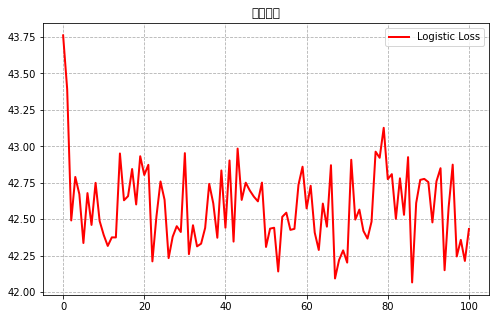

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.704771
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.583051
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.831844
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.441715
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.635379
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.825826
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.256106
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.551576
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.602317
total_train_accuracy

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 85, total loss: 42.735722
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.832694
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.209204
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.598755
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.728041
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.245512
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.333652
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.784192
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.485805
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.018210
total_train_accuracy: tensor(0.9729, dev

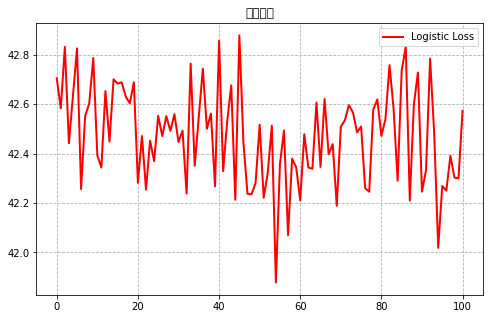

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.681318
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.356133
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.474253
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.792253
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.410317
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.299379
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 6, total loss: 41.981300
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 7, total loss: 42.191843
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 8, total loss: 42.256753
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.528003
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 86, total loss: 42.077294
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.317222
total_train_accuracy: tensor(0.9979, device='cuda:0')
Training Epoch: 88, total loss: 41.824684
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.570418
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.148321
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.433109
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 92, total loss: 42.073972
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 93, total loss: 42.001613
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.110679
total_train_accuracy: tensor(0.9792, dev

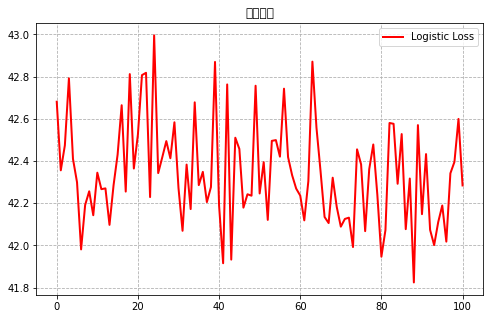

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.469397
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.429959
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.293859
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.749678
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 4, total loss: 42.406090
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.505156
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 6, total loss: 41.758243
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.611241
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.811109
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.413446
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.517559
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.408949
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.435163
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.216224
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.218157
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.492918
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.272830
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.318364
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.345441
total_train_accuracy: tensor(0.9667, dev

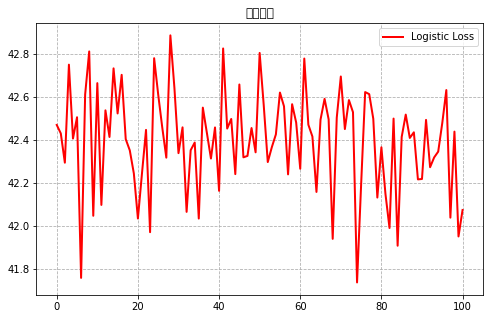

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.491856
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.526936
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.657004
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.178319
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.421120
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.371233
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.779040
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.459272
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.431194
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.444887
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.407678
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.268155
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 88, total loss: 42.009544
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.221480
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.278893
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.299174
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 92, total loss: 42.111102
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.335925
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.165417
total_train_accuracy: tensor(0.9938, dev

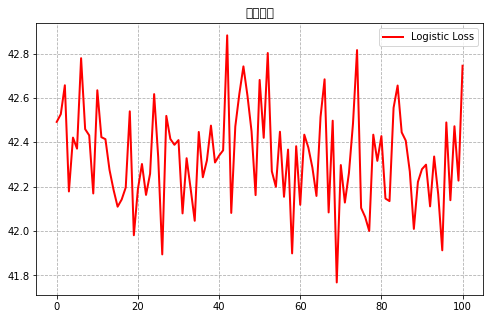

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.7917, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.7916667, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9708334


In [11]:
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(161, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 162
f1_score:  %.4f 0.8879242405214198
accuracy_score: 0.8913043478260869
recall_score: 0.8836756924992218
pre_recall: 0.9145625842929763
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

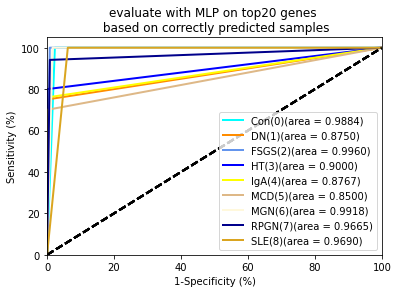

In [12]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluate with MLP on top20 genes \n based on correctly predicted samples')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [16]:
#evaluate top30, repeat top 50 or top 20
#for genes_30
#compute mean value of all the correctly predicted samples:
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,30,largest=True)##############################30
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/contri_30_names_df.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/genes_30.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_30/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_30/test_info.csv')





118 3301
RHOA       11.792157
STX2        7.690638
CISD1       9.532091
WDR11       8.285777
SCYL2       6.868603
             ...    
SULT1A1    10.304439
AMOT       11.585499
CA1         6.508585
GPR35       5.447444
label       4.694915
Length: 3301, dtype: float64
[[11.79215674  7.69063812  9.53209125 ... 11.58549873  6.50858505
   5.44744399]]
        0         1         2         3         4         5         6     \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       7         8         9     ...      3290      3291      3292      3293  \
0  5.615789  5.040705  6.717693  ...  8.144511  6.226283  8.062481  6.368055   

       3294     3295       3296       3297      3298      3299  
0  7.609171  6.73945  10.304439  11.585499  6.508585  5.447444  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11     SCYL2   MGC2889    CCDC47  \
0  11.792157  7.690638  9.532091  8.285777  6.868603  5.032297  9.452288   

       KLF8      CCL1   SLC

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['UBXN8', 'AHCYL1', 'RPS24', 'ITIH2', 'OAS1', 'SLC49A3', 'IFIT2', 'PDK3', 'ACLY', 'MRPL19', 'ALB', 'C1orf56', 'ACOX2', 'AADAC', 'FGFR2', 'NDUFA2', 'KLF6', 'F12', 'TNMD', 'ALOX5AP', 'NDUFA13', 'ALDH3A2', 'ENPP2', 'DNAJB1', 'HMGCS2', 'C1orf68', 'CFB', 'TMBIM6', 'RPL38', 'ERGIC2', 'METTL9', 'COX15', 'PDE8A', 'LLGL2', 'DUSP6', 'PCK1', 'ACVR1B', 'ABCB4', 'OVOL2', 'TESC', 'SUCLG1', 'SPI1', 'PAFAH1B3', 'MAP3K1', 'PTGER1', 'RPL37A', 'LSM8', 'LRRC23', 'MNX1', 'ITGB3BP', 'PTMS', 'GPC5', 'BCCIP', 'NR1D2', 'MRPS15', 'CP', 'CFLAR', 'CHP1', 'LDHB', 'TRA2A', 'OXCT1', 'RHOB', 'AGL', 'IFI27', 'UGDH', 'CD83', 'LHPP', 'ACTA2', 'LYPLA1', 'SLC3A2', 'LGMN', 'RHOBTB1', 'ACADVL', 'VAMP8', 'ABCD3', 'IFIT1', 'BHLHE40', 'ADGRF1', 'GPX3', 'COX5B', 'AFP', '

549 229
549 229


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:491: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:492: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2396, device='cuda:0')
Training Epoch: 0, total loss: 63.892507
total_train_accuracy: tensor(0.5354, device='cuda:0')
Training Epoch: 1, total loss: 60.436951
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 2, total loss: 58.790672
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 3, total loss: 57.779701
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 4, total loss: 56.362888
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 5, total loss: 55.826584
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 6, total loss: 54.699194
total_train_accuracy: tensor(0.8000, device='cuda:0')
Training Epoch: 7, total loss: 54.068061
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 8, total loss: 54.174245
total_train_accuracy: tensor(0.8063, device='cuda:0')
Training Epoch: 9, total loss: 53.582820
total_train_accuracy: tensor(0.7917, device='cuda:

total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 86, total loss: 45.010575
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 87, total loss: 45.181028
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 88, total loss: 45.331641
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 45.130756
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 44.961278
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 45.078805
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 45.348340
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 44.762763
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 44.895516
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 95, total loss: 45.060651
total_train_accuracy: tensor(0.9708, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

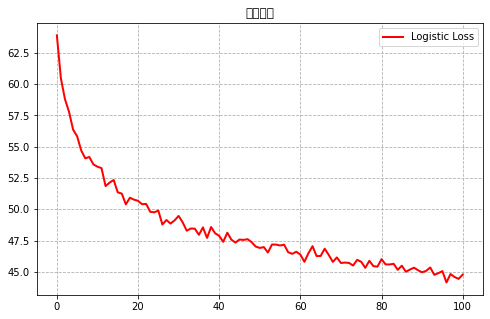

test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 229


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:529: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 229
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 0, total loss: 45.334411
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 1, total loss: 45.688302
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 2, total loss: 45.139367
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 45.154291
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 4, total loss: 44.829234
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 5, total loss: 45.261293
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 6, total loss: 45.125260
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 7, total loss: 45.425245
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 8, total loss: 44.866571
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 9, total loss: 44.744831
total_train_accuracy: tensor(0.9438, devic

total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 43.956512
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 43.196790
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 88, total loss: 43.838404
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 43.025973
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 43.277656
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 43.265305
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 43.400922
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.587968
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 94, total loss: 43.925077
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 95, total loss: 43.907298
total_train_accuracy: tensor(0.9688, dev

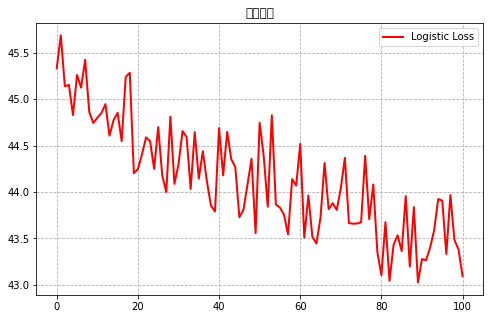

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.692269
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 43.208496
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 2, total loss: 43.847707
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 43.646289
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.655197
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 43.313708
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 43.316403
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.512013
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.302355
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 43.095404
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.685767
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.061478
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.728270
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.969388
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.772601
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.475548
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.838160
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.022061
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.885121
total_train_accuracy: tensor(0.9813, dev

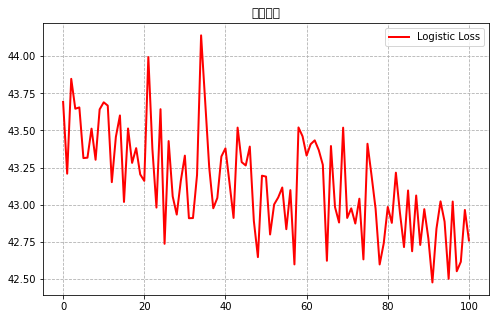

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.364147
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.102712
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.837601
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.842146
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.154584
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 43.027874
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.866462
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.995862
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.304587
total_train_

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.436609
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.494066
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.429768
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.341072
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.778037
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.352820
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.839350
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.401371
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 93, total loss: 43.229783
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.698982
total_train_accuracy: tensor(0.9688, dev

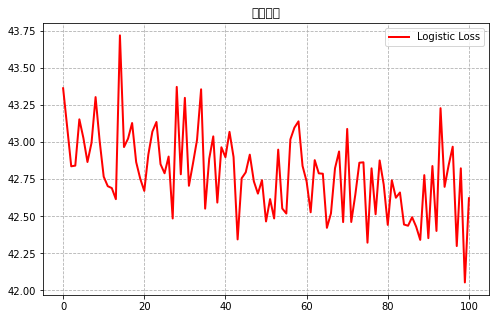

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.338511
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.173737
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 43.591567
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.701169
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.049194
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.630718
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.540782
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.616016
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.961269
total_train_accuracy

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.269028
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.472445
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.810220
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.353912
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.905766
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.643276
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.281359
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.621183
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.423329
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.229591
total_train_accuracy: tensor(0.9750, dev

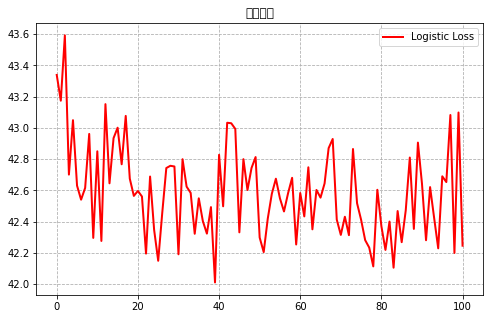

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.486883
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.208398
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.609993
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.769432
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.609156
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.514418
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.448191
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.322948
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 42.962040
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.728340
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.278577
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.650060
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.551690
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 42.575556
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.529859
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.184767
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.859527
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.360341
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.505688
total_train_accuracy: tensor(0.9667, dev

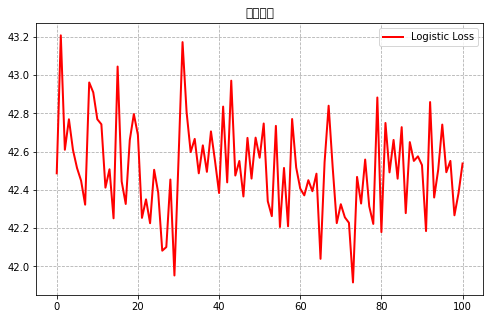

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.123853
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.945648
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.640972
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.566891
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.764148
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.102688
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.502698
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.693265
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 8, total loss: 42.287968
total_train_accuracy

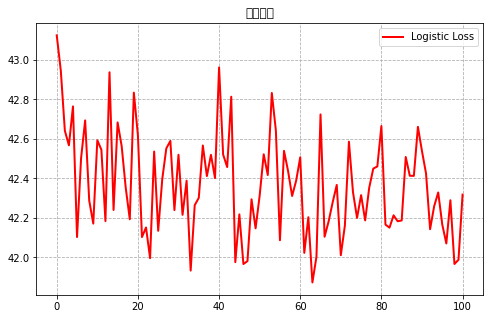

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.657362
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 1, total loss: 42.176283
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.658671
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.576213
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.437003
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 5, total loss: 42.173934
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.286966
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.239783
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.265825
total_train_accuracy

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.729643
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.385388
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.677269
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 42.884313
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.584571
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.384538
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 92, total loss: 41.958856
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.234011
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.225682
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 95, total loss: 41.957387
total_train_accuracy: tensor(0.9813, dev

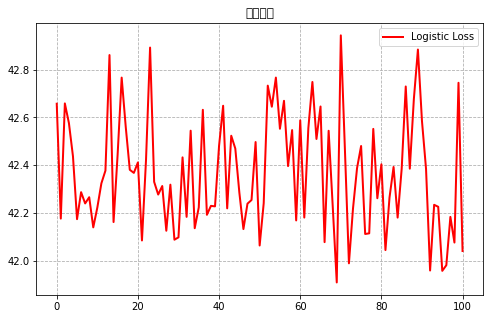

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.385685
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.682046
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.252949
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.581673
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.699080
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.427517
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.628495
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 7, total loss: 42.140866
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.550984
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.266698
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.455020
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.727150
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.315653
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.463982
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.247288
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.161676
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.480672
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.200583
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 94, total loss: 41.822098
total_train_accuracy: tensor(0.9708, dev

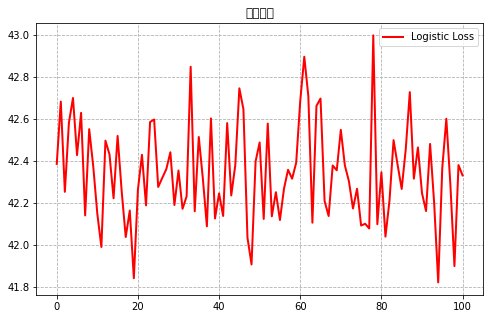

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 229
549 229
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.369578
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.076902
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.137747
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.142679
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.271042
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.335845
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.147761
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 42.054879
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.276947
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.177044
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 86, total loss: 41.910156
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.276875
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.111076
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.413657
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 90, total loss: 42.105630
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.130130
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.393939
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.366660
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.232545
total_train_accuracy: tensor(0.9833, dev

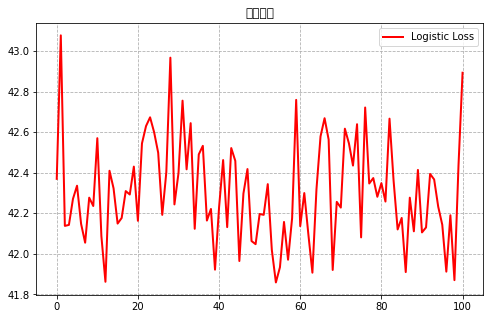

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.7917, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.7916667, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9708334


In [17]:
model=model3
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_30/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_30/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_30/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP3(
  (bn0): BatchNorm1d(228, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=228, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 229
f1_score:  %.4f 0.9072816624944069
accuracy_score: 0.9057971014492754
recall_score: 0.9099719887955183
pre_recall: 0.9132364893013979
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

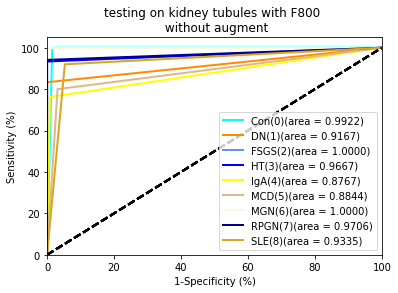

In [18]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_30/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP3()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_30/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing on kidney tubules with F800 \n without augment')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

